<a href="https://colab.research.google.com/github/Manish1176/Deep-Learning-Project/blob/main/DL_Project_2_MNIST_Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**loading mnist dataset from keras**

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


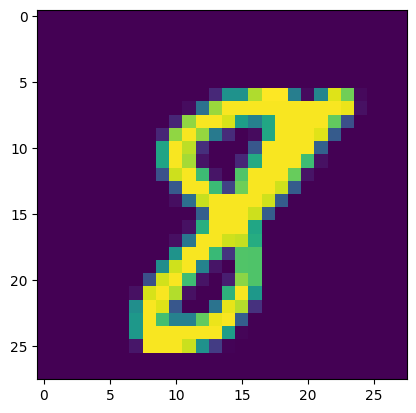

8


In [8]:
# displaying the image

plt.imshow(X_train[55])
plt.show()

# print the corresponding label
print(Y_train[55])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding
All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [12]:
# printing the 10th image

print(X_train[28])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  80 189 254 255 254 254 254 174 101  31  50  12   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  80 242 253 253 253 253 253 253 253 253 216 226 206 200
  200  58   0   0   0   0   0   0   0   0]
 [  0   0   0   0 101 253 253 253 253 253 253 253 253 253 253 253 253 253
  253 227  53   0   0   0   0   0   0   0]
 [  0   0   0   0 251 253 253 253 253 253 253 253 253 253 253 25

Scaling the values

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
print(X_train[28])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2553 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1104 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0771 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

**Accuracy in test data**

In [20]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9773
0.9772999882698059


In [21]:
print(X_test.shape)

(10000, 28, 28)


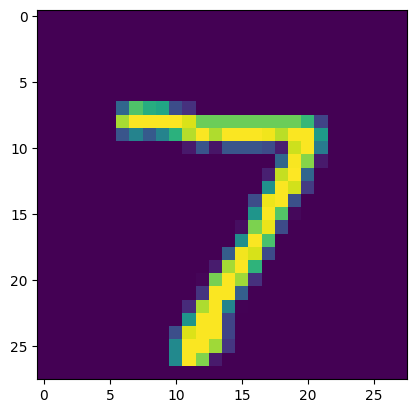

In [22]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [23]:
print(Y_test[0])

7


In [24]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
print(Y_pred.shape)

(10000, 10)


In [26]:
print(Y_pred[0])

[1.4320098e-12 7.8287943e-10 4.3019952e-09 1.5113043e-08 6.3796401e-14
 3.2414155e-11 1.0298464e-18 9.9999994e-01 2.2020738e-12 1.0942299e-09]


model.predict() gives the prediction probability of each class for that data point

In [27]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [28]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

**Confusin Matrix**

In [29]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 971    0    0    1    2    0    1    1    3    1]
 [   0 1128    0    0    0    1    2    0    4    0]
 [   6    7  995    5    3    2    4    4    6    0]
 [   0    0    2  979    0   11    0    4    5    9]
 [   3    0    1    0  963    0    4    2    1    8]
 [   4    0    0    5    2  875    3    0    3    0]
 [   3    3    0    1    4    5  940    0    2    0]
 [   1    5    4    1    1    0    0 1008    3    5]
 [   2    0    1    4    6   10    1    2  944    4]
 [   4    4    0    2   15    4    1    8    1  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

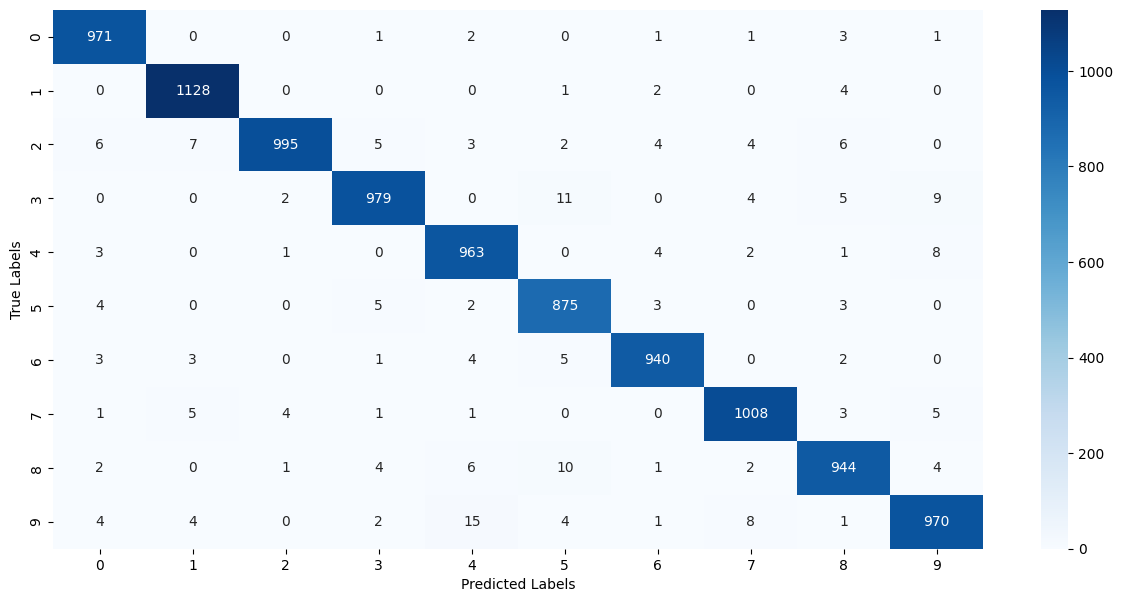

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [32]:
!wget 'https://conx.readthedocs.io/en/latest/_images/MNIST_44_0.png'

--2024-06-10 08:42:41--  https://conx.readthedocs.io/en/latest/_images/MNIST_44_0.png
Resolving conx.readthedocs.io (conx.readthedocs.io)... 104.17.33.82, 104.17.32.82, 2606:4700::6811:2152, ...
Connecting to conx.readthedocs.io (conx.readthedocs.io)|104.17.33.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 955 [image/png]
Saving to: ‘MNIST_44_0.png’

MNIST_44_0.png      100%[===================>]     955  --.-KB/s    in 0s      

2024-06-10 08:42:41 (11.2 MB/s) - ‘MNIST_44_0.png’ saved [955/955]



In [33]:
input_image_path = '/content/mnist.png'

input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


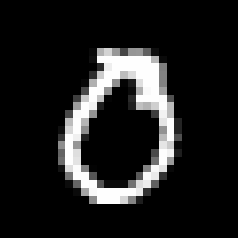

In [36]:
cv2_imshow(input_image)

In [37]:
input_image.shape

(238, 238, 3)

In [38]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [39]:
grayscale.shape

(238, 238)

In [40]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [41]:
input_image_resize.shape

(28, 28)

In [42]:
cv2_imshow(input_image_resize)

In [43]:
input_image_resize = input_image_resize/255

In [44]:
type(input_image_resize)

numpy.ndarray

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [46]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 29ms/step
[[9.9999988e-01 1.4023217e-07 1.9581461e-09 1.2998062e-10 9.6183263e-18
  4.3418602e-09 1.0935352e-09 9.0641041e-09 1.4861861e-08 6.7500685e-09]]


In [47]:
input_pred_label = np.argmax(input_prediction)

In [48]:
print(input_pred_label)

0


**Predictive System**

In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: 8


AttributeError: 'NoneType' object has no attribute 'clip'